# Tracking Covid-19 using plotly

### Tutorial on visualizing Covid-19 data using python and plotly

**Today's video will cover following:**

1. **Getting Covid-19 data from Johns Hopkins github repository**
2. **Preprocess the data in the format needed for the visualization**
3. **Creating a donut chart to visualize the Active, Recovered and Dead percentage using plotly**

**Dependencies**

In [1]:
import plotly
plotly.__version__

'4.7.1'

In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
print(pio.renderers)
# pio.renderers.default = "jupyterlab"

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']



**Data Sources**

In [3]:
CONFIRMED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
RECOVERED_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
DEAD_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

**Getting the data into dataframes**

In [4]:
covid_confirmed_ts = pd.read_csv(CONFIRMED_URL)
covid_recovered_ts = pd.read_csv(RECOVERED_URL)
covid_dead_ts = pd.read_csv(DEAD_URL)

In [5]:
covid_confirmed_ts.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,789,795,803,820,832,842,850,856,868,872
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,747,748,750,751,751,752,752,754,755,755
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,35,35,36,36,36,43,43,45,45


**Calculations**

In [6]:
total_confirmed =  covid_confirmed_ts.iloc[:,-1].sum()
print('Total Confirmed: ',total_confirmed)

total_recovered =  covid_recovered_ts.iloc[:,-1].sum()
print('Total Recovered: ',total_recovered)

total_dead =  covid_dead_ts.iloc[:,-1].sum()
print('Total Dead: ',total_dead)

total_active = total_confirmed - total_recovered - total_dead
print('Total Active: ',total_active)

Total Confirmed:  4177502
Total Recovered:  1456209
Total Dead:  286330
Total Active:  2434963


**Final DataFrame**

In [7]:
df = pd.DataFrame(data = [total_active,total_recovered,total_dead],
                        index = ['Active','Recovered','Dead'],
                        columns=['Total'])
df

,Total
Active,2434963
Recovered,1456209
Dead,286330


**Plotting using plotly**

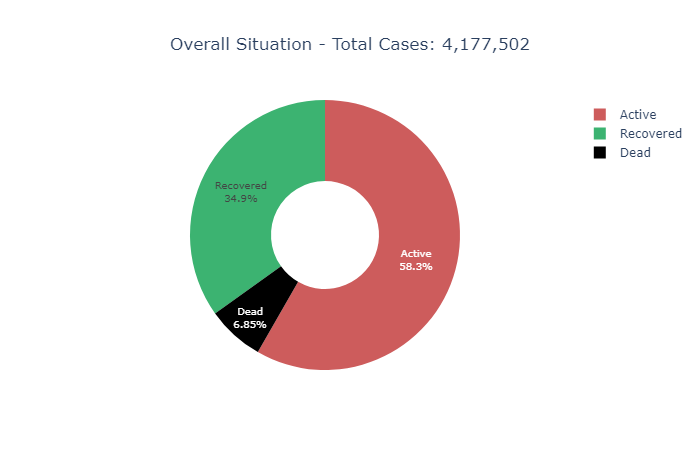

In [10]:
fig = px.pie(df, values='Total',
         names=df.index,
         labels=['Active','Recovered','Dead'],
         hole=.4,
         title='Overall Situation - Total Cases: {:,}'.format(total_confirmed),
         color=df.index,color_discrete_map={'Active':'indianred',
                             'Recovered':'mediumseagreen',
                             'Dead':'black'})
fig.update_traces(textposition='inside', textinfo='percent+label',
                    textfont_size=10,showlegend=True,
                    insidetextorientation='horizontal')
fig.update_layout(title_x=0.5)
fig.show("png")